In [69]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re
import pandas as pd                # 데이터를 저장하고 처리하는 패키지
import matplotlib as mpl           # 그래프를 그리는 패키지
import matplotlib.pyplot as plt    # 그래프를 그리는 패키지
import csv
import matplotlib.dates as mdates
import os

df =  pd.read_csv('data/seoulreal.csv',encoding='utf-8')
d_ = df.sort_values(by='redate', ascending=False, ignore_index=True) #정렬
df.drop(columns=['lostSEQ','state','dateofreceipt','details','place','ID','name','region','company','thing','views','ext'], inplace=True) #사용하지 않는 값 삭제
#isno = None만 찾아주는 것
pd.isna(df)
df = df.dropna() #결측치 제거

<class 'pandas.core.series.Series'>


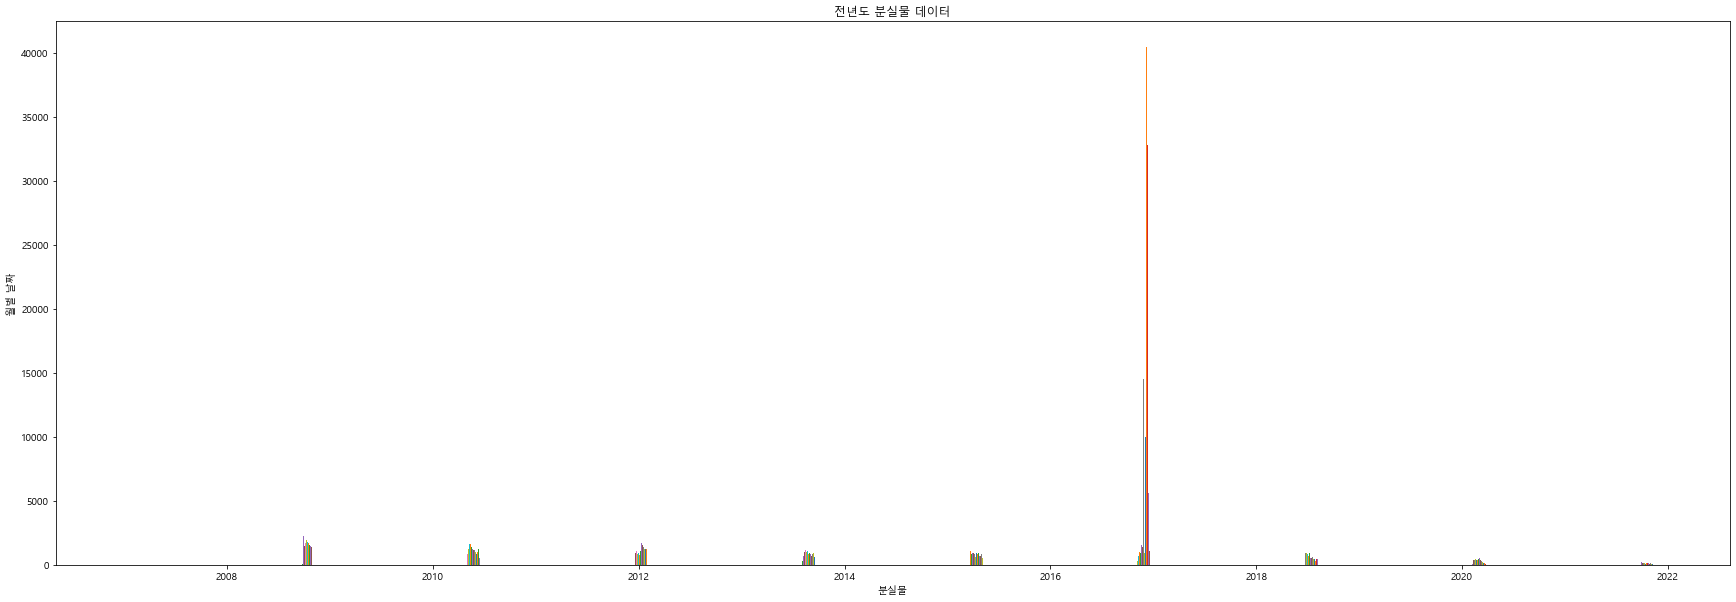

In [208]:
df['date'] = pd.to_datetime(df['redate'].str.strip(), format='%Y-%m-%d', errors='raise')  #int를 str로 change

# 'redate' = 날짜
# 'kinds' = 물품
# df_new.reset_index(inpddlace=True) #인덱스 수 reset_index



df.set_index(df['date'], inplace=True) #데이트 칼럼을 인덱스로 지정

# weekly_df = df.resample('W-Mon', how={'kinds':np.sum}).fillna(0) #월요일 설정
print(type(df['date']))
day = [g for n, g in df.set_index('date').groupby(pd.Grouper(freq='D'))]#일마다 지정

week = [g for n, g in df.set_index('date').groupby(pd.Grouper(freq='W'))]#주마다 지정

month = [g for n, g in df.set_index('date').groupby(pd.Grouper(freq='M'))]#월마다 지정


month_list = []


for i in month :
    # print(i.index)
    month_list.append(i.index)
# print(type(i))



plt.figure(figsize=(30,10))
plt.rc('font',family='Malgun Gothic') #맑은 고딕font set
plt.hist(month_list)
plt.title('전년도 분실물 데이터')
plt.xlabel('분실물')
plt.ylabel('월별 날짜')
# plt.ylim((1000,2000))
plt.show()

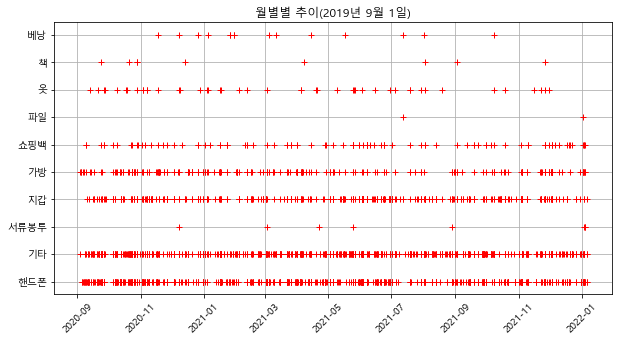

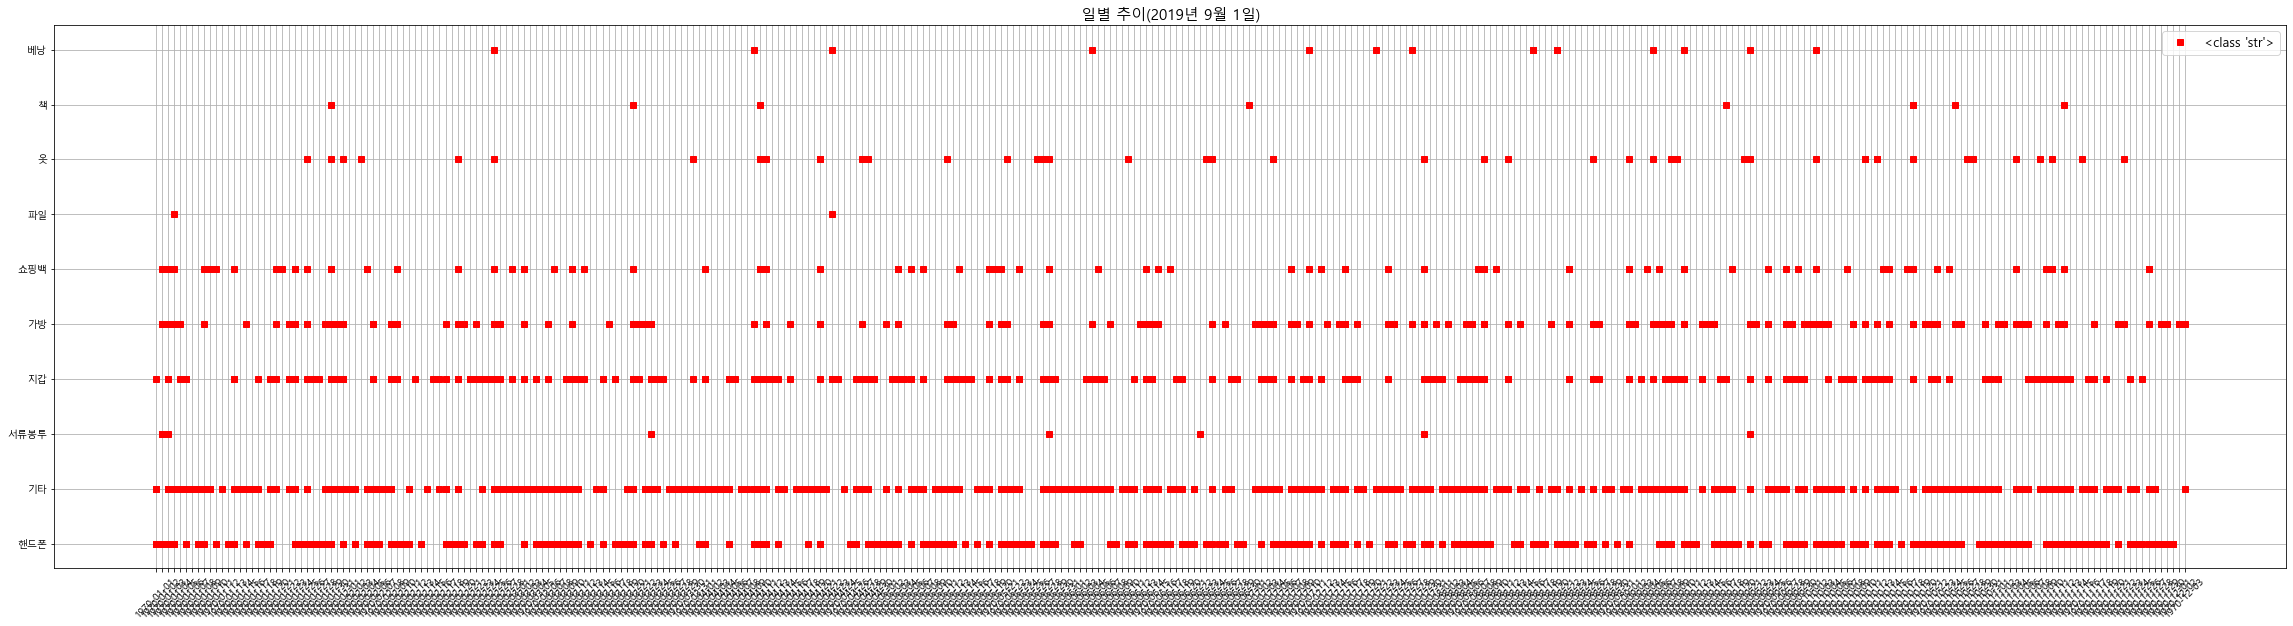

In [403]:
plt.figure(figsize=(10,5))
d_ = df[df["redate"] > "2020-09-02"]
plt.rc('font',family='Malgun Gothic')
plt.title("월별별 추이(2019년 9월 1일)")
plt.xticks(rotation=45)
plt.grid()
plt.plot(d_['date'], d_['kinds'], 'r+')
plt.show()


# spot_ = 184
plt.figure(figsize=(40,10))
plt.title("일별 추이(2019년 9월 1일)", fontsize=15)
ax = plt.subplot(1,1,1)
plt.xticks(rotation=45)
ax.plot(d_["redate"],d_["kinds"], "rs", label=str)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.legend(fontsize=13)
plt.grid()
plt.show()

#ba
# redate등록일자 dateofreceipt분실일자 kinds 종류
# seoul_df = df.loc[[]]
# seoul_df

In [196]:
df['month_date'] = pd.to_datetime(df['redate']).dt.strftime('%Y-%m')
df

,redate,kinds,date,month_date
date,,,,
2022-01-06,2022-01-06,핸드폰,2022-01-06,2022-01
2022-01-06,2022-01-06,기타,2022-01-06,2022-01
2022-01-04,2022-01-04,핸드폰,2022-01-04,2022-01
2022-01-04,2022-01-04,서류봉투,2022-01-04,2022-01
2022-01-06,2022-01-06,기타,2022-01-06,2022-01
...,...,...,...,...
2016-09-21,2016-09-21,기타,2016-09-21,2016-09
2009-04-22,2009-04-22,핸드폰,2009-04-22,2009-04
2009-02-07,2009-02-07,핸드폰,2009-02-07,2009-02


In [206]:
# plt.figure(figsize=(10,10))
# plt.bar(df[df['month_date'] < "2021-12-30"] , df['kinds'])

In [405]:
df_new = df.groupby(['month_date','kinds'], as_index=False).count()
df_day = df.groupby(['redate','kinds'], as_index=False).count()
df_day

,redate,kinds,date,month_date
0,2006-12-04,지갑,1,1
1,2007-11-07,핸드폰,1,1
2,2007-11-12,기타,1,1
3,2007-11-15,핸드폰,1,1
4,2007-11-22,가방,1,1
...,...,...,...,...
23552,2022-01-04,쇼핑백,1,1
23553,2022-01-04,핸드폰,2,2
23554,2022-01-06,기타,2,2
23555,2022-01-06,지갑,1,1


In [309]:
d21_ = df_new[df_new["month_date"].between("2021-01","2021-12")]
d20_ = df_new[df_new["month_date"].between("2020-01","2020-12")]
d19_ = df_new[df_new["month_date"].between("2019-01","2019-12")]
d18_ = df_new[df_new["month_date"].between("2018-01","2018-12")]
d17_ = df_new[df_new["month_date"].between("2017-01","2017-12")]
d16_ = df_new[df_new["month_date"].between("2016-01","2016-12")]
d15_ = df_new[df_new["month_date"].between("2015-01","2015-12")]
d14_ = df_new[df_new["month_date"].between("2014-01","2014-12")]
d13_ = df_new[df_new["month_date"].between("2013-01","2013-12")]
d12_ = df_new[df_new["month_date"].between("2012-01","2012-12")]
d11_ = df_new[df_new["month_date"].between("2011-01","2011-12")]
d10_ = df_new[df_new["month_date"].between("2010-01","2010-12")]
d09_ = df_new[df_new["month_date"].between("2009-01","2009-12")]
d08_ = df_new[df_new["month_date"].between("2008-01","2008-12")]
d07_ = df_new[df_new["month_date"].between("2007-01","2007-12")]
d06_ = df_new[df_new["month_date"].between("2006-01","2006-12")]

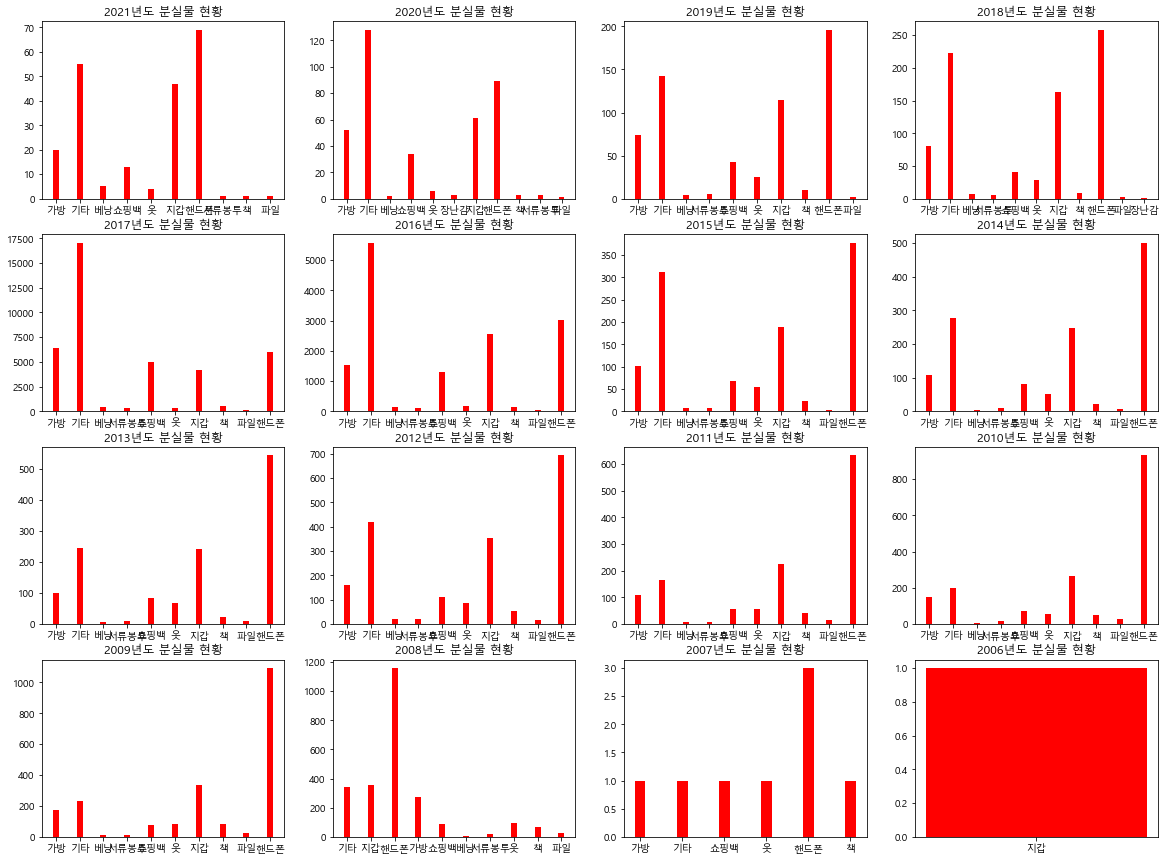

In [357]:
# Plot bar chart 
#2021년도
plt.figure(figsize=(20,15))
plt.subplot(4, 4, 1)
plt.bar(d21_['kinds'], d21_['date'], color ='r', width = 0.25)
plt.title("2021년도 분실물 현황")

#2020년도
plt.subplot(4, 4, 2)
plt.bar(d20_['kinds'], d20_['date'], color ='r', width = 0.25)
plt.title("2020년도 분실물 현황")

# 2019년도
plt.subplot(4, 4, 3)
plt.bar(d19_['kinds'], d19_['date'], color ='r', width = 0.25)
plt.title("2019년도 분실물 현황")

# 2018년도

plt.subplot(4, 4, 4)
plt.bar(d18_['kinds'], d18_['date'], color ='r', width = 0.25)
plt.title("2018년도 분실물 현황")

# 2017년도

plt.subplot(4, 4, 5)
plt.bar(d17_['kinds'], d17_['date'], color ='r', width = 0.25)
plt.title("2017년도 분실물 현황")

# 2016년도

plt.subplot(4, 4, 6)
plt.bar(d16_['kinds'], d16_['date'], color ='r', width = 0.25)
plt.title("2016년도 분실물 현황")

# 2015년도

plt.subplot(4, 4, 7)
plt.bar(d15_['kinds'], d15_['date'], color ='r', width = 0.25)
plt.title("2015년도 분실물 현황")

# 2014년도

plt.subplot(4, 4, 8)
plt.bar(d14_['kinds'], d14_['date'], color ='r', width = 0.25)
plt.title("2014년도 분실물 현황")

# 2013년도

plt.subplot(4, 4, 9)
plt.bar(d13_['kinds'], d13_['date'], color ='r', width = 0.25)
plt.title("2013년도 분실물 현황")

# 2012년도

plt.subplot(4, 4, 10)
plt.bar(d12_['kinds'], d12_['date'], color ='r', width = 0.25)
plt.title("2012년도 분실물 현황")

# 2011년도

plt.subplot(4, 4, 11)
plt.bar(d11_['kinds'], d11_['date'], color ='r', width = 0.25)
plt.title("2011년도 분실물 현황")

# 2010년도

plt.subplot(4, 4, 12)
plt.bar(d10_['kinds'], d10_['date'], color ='r', width = 0.25)
plt.title("2010년도 분실물 현황")

# 2009년도

plt.subplot(4, 4, 13)
plt.bar(d09_['kinds'], d09_['date'], color ='r', width = 0.25)
plt.title("2009년도 분실물 현황")

# 2008년도

plt.subplot(4, 4, 14)
plt.bar(d08_['kinds'], d08_['date'], color ='r', width = 0.25)
plt.title("2008년도 분실물 현황")

# 2007년도

plt.subplot(4, 4, 15)
plt.bar(d07_['kinds'], d07_['date'], color ='r', width = 0.25)
plt.title("2007년도 분실물 현황")

# 2006년도

plt.subplot(4, 4, 16)
plt.bar(d06_['kinds'], d06_['date'], color ='r', width = 0.25)
plt.title("2006년도 분실물 현황")


plt.show()

In [450]:
m1_ = df_day[df_day["redate"].between("2021-01-01","2021-01-31")]
m2_ = df_day[df_day["redate"].between("2021-02-01","2021-02-31")]
m3_ = df_day[df_day["redate"].between("2021-03-01","2021-03-31")]
m4_ = df_day[df_day["redate"].between("2021-04-01","2021-04-31")]
m5_ = df_day[df_day["redate"].between("2021-05-01","2021-05-31")]
m6_ = df_day[df_day["redate"].between("2021-06-01","2021-06-31")]
m7_ = df_day[df_day["redate"].between("2021-07-01","2021-07-31")]
m8_ = df_day[df_day["redate"].between("2021-08-01","2021-08-31")]
m9_ = df_day[df_day["redate"].between("2021-09-01","2021-09-31")]
m10_ = df_day[df_day["redate"].between("2021-10-01","2021-10-31")]
m11_ = df_day[df_day["redate"].between("2021-11-01","2021-11-31")]
m12_ = df_day[df_day["redate"].between("2021-12-01","2021-12-31")]


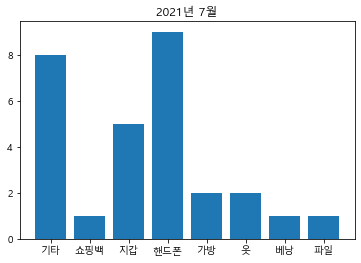

In [424]:

plt.title("2021년 7월")
# plt.pie(df_day['date'], labels = df_day['kinds'])

plt.bar(m7_['kinds'], m7_['date'])

plt.show()


분실물을 보고싶은 월을 기재하세요. 5


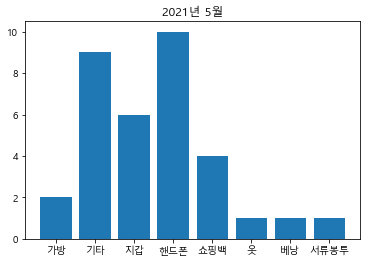

In [456]:
a = int(input('분실물을 보고싶은 월을 기재하세요.'))


if a > 12 :
    print("1월부터 12월까지 중 숫자만 기입해주세요.")
elif a < 10 :
    month = '0' + str(a)
elif a > 10 :
     month = str(a)
    
start = '2021-'+str(month)+'-01'
end = '2021-'+str(month)+'-31'



df_g = df_day[df_day["redate"].between(start,end)]

plt.title("2021년 %d월"%a)
plt.bar(df_g['kinds'], df_g['date'])

plt.show()

2006-2021까지 분실물을 보고싶은 년도를 4자리를 기재하세요. 2012


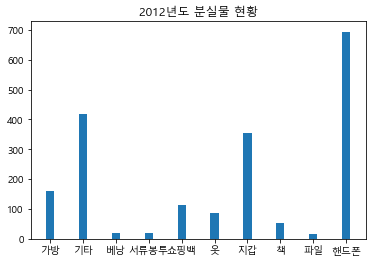

In [467]:
b =int(input('2006-2021까지 분실물을 보고싶은 년도를 4자리를 기재하세요.'))
if b > 2021 :
    print('2021보다 큰 년도 수는 나타낼 수 없습니다.')
# elif b > 10 :
#     year = '0' + str(b)
elif b < 2006 :
    print('2006보다 작은 년도 수는 나타낼 수 없습니다.')


start = str(b) + "-01"
end = str(b) + "-12"

df_y = df_new[df_new['month_date'].between(start,end)]
plt.bar(df_y['kinds'], df_y['date'], width = 0.25)
plt.title('%d년도 분실물 현황'%b)
plt.show()


In [466]:
c =input('2006-2021중 보고싶은 년도의 월을 yyyymm 형식으로 기재하세요.')

start = str(c) + "-01"
end = str(b) + "-12"

df_y = df_new[df_new['month_date'].between(start,end)]
plt.bar(df_y['kinds'], df_y['date'], width = 0.25)
plt.title('%d년도 분실물 현황'%b)
plt.show()


,redate,kinds,date,month_date
date,,,,
2022-01-06,2022-01-06,핸드폰,2022-01-06,2022-01
2022-01-06,2022-01-06,기타,2022-01-06,2022-01
2022-01-04,2022-01-04,핸드폰,2022-01-04,2022-01
2022-01-04,2022-01-04,서류봉투,2022-01-04,2022-01
2022-01-06,2022-01-06,기타,2022-01-06,2022-01
...,...,...,...,...
2016-09-21,2016-09-21,기타,2016-09-21,2016-09
2009-04-22,2009-04-22,핸드폰,2009-04-22,2009-04
2009-02-07,2009-02-07,핸드폰,2009-02-07,2009-02
